# **Dataset Description: PUMS 1-Year Data (U.S. Census Bureau)**

#### The PUMS (Public Use Microdata Sample) dataset is a rich, person-level sample of responses collected by the U.S. Census Bureau through the American Community Survey (ACS).

#### It provides anonymized individual-level data that allows researchers and analysts to explore demographic, social, economic, and housing characteristics of the U.S. population.

#### This dataset is derived from a one-year sample, meaning it reflects the population characteristics of a single calendar year.

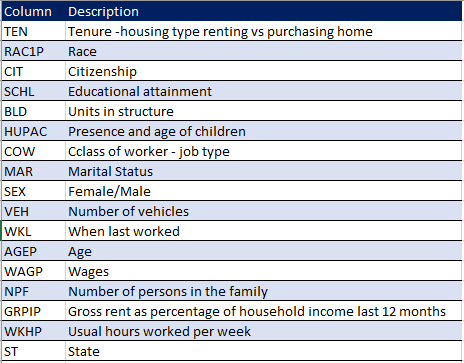

# Step 1: Load the Data

In [ ]:
import pandas as pd

# Replace with the path to your uploaded file
df = pd.read_csv("/content/ACSPUMS1Y2022_Georgia_Data.csv")
df.head()


,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,ST
0,0,2,1,12,0,0,0,1,1,-1,3,48,0,1,0,0,13
1,0,1,1,18,0,0,0,5,1,-1,3,19,0,1,0,0,13
2,0,2,1,17,0,0,0,1,1,-1,3,36,0,1,0,0,13
3,0,2,1,17,0,0,4,5,1,-1,1,27,31300,1,0,48,13
4,0,1,1,22,0,0,0,3,1,-1,3,92,0,1,0,0,13


In [ ]:
# Number of rows and columns
df.shape

(109349, 17)

# Step 2: Map Numeric Codes to Readable Categories

In [ ]:
# =======================
# 1. Define Mapping Dictionaries
# =======================

marital_status_map = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never married"
}

citizenship_map = {
    1: "Born in US",
    2: "Born in Territory",
    3: "Born abroad to US parents",
    4: "Naturalized",
    5: "Not a citizen"
}

class_of_worker_map = {
    0: "Not Applicable",
    1: "Private for-profit",
    2: "Private nonprofit",
    3: "Local government",
    4: "State government",
    5: "Self-employed"
}

sex_map = {
    1: "Male",
    2: "Female"
}

# Remap the education feature to reduce the dimensionality and sparse matrix issues that can occur for XGBOOST
# education_map = {
#     0: "N/A",
#     1: "No schooling",
#     2: "Nursery/Preschool",
#     3: "Kindergarten",
#     4: "Grade 1",
#     5: "Grade 2",
#     6: "Grade 3",
#     7: "Grade 4",
#     8: "Grade 5",
#     9: "Grade 6",
#     10: "Grade 7",
#     11: "Grade 8",
#     12: "Grade 9",
#     13: "Grade 10",
#     14: "Grade 11",
#     15: "12th grade, no diploma",
#     16: "HS diploma",
#     17: "GED",
#     18: "Some college <1yr",
#     19: "Some college >1yr",
#     20: "Associate's",
#     21: "Bachelor's",
#     22: "Master's",
#     23: "Professional degree"
# }

education_map = {
    0: "N/A",
    1: "No schooling",
    2: "Pre-K to Grade 4",
    3: "Pre-K to Grade 4",
    4: "Pre-K to Grade 4",
    5: "Pre-K to Grade 4",
    6: "Grade 5-8",
    7: "Grade 5-8",
    8: "Grade 5-8",
    9: "Grade 5-8",
    10: "Grade 9-12 (no diploma)",
    11: "Grade 9-12 (no diploma)",
    12: "Grade 9-12 (no diploma)",
    13: "Grade 9-12 (no diploma)",
    14: "Grade 9-12 (no diploma)",
    15: "Grade 9-12 (no diploma)",
    16: "High School Graduate",
    17: "High School Graduate",
    18: "Some College",
    19: "Some College",
    20: "Associate's",
    21: "Bachelor's",
    22: "Graduate Degree",
    23: "Graduate Degree"
}

race_map = {
    1: "White",
    2: "Black",
    3: "American Indian",
    4: "Alaska Native",
    5: "Tribes Specified",
    6: "Asian",
    7: "Pacific Islander",
    8: "Other",
    9: "Two or More Races"
}

tenure_map = {
0: "N/A",
1: "Owned with mortgage or loan (include home equity loans)",
2: "Owned Free And Clear",
3: "Rented",
4: "Occupied without payment of rent"
}

building_map = {
0: "N/A",
1: "Mobile Home or Trailer",
2: "One-family house detached",
3: "One-family house attached",
4: "2 Apartments",
5: "3-4 Apartments",
6: "5-9 Apartments",
7: "10-19 Apartments",
8: "20-49 Apartments",
9: "50 or More Apartments",
10: "Boat, RV, van, etc."
}

children_map = {
0: "N/A",
1: "With children under 6 years only",
2: "With children 6 to 17 years only",
3: "With children under 6 years and 6 to 17 years",
4: "No children"
}

vehicle_map = {
-1: "N/A",
0: "No vehicles",
1: "1 vehicle",
2: "2 vehicles",
3: "3 vehicles",
4: "4 vehicles",
5: "5 vehicles",
6: "6 or more vehicles"
}


# =======================
# 2. Apply the Mapping
# =======================

df["MAR"] = df["MAR"].map(marital_status_map)
df["CIT"] = df["CIT"].map(citizenship_map)
df["COW"] = df["COW"].map(class_of_worker_map)
df["SEX"] = df["SEX"].map(sex_map)
df["SCHL"] = df["SCHL"].map(education_map)
df["RAC1P"] = df["RAC1P"].map(race_map)
df["TEN"] = df["TEN"].map(tenure_map)
df["BLD"] = df["BLD"].map(building_map)
df["HUPAC"] = df["HUPAC"].map(children_map)
df["VEH"] = df["VEH"].map(vehicle_map)

# View the first five rows
df.head()

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,ST
0,N/A,Black,Born in US,Grade 9-12 (no diploma),N/A,N/A,Not Applicable,Married,Male,N/A,3,48,0,1,0,0,13
1,N/A,White,Born in US,Some College,N/A,N/A,Not Applicable,Never married,Male,N/A,3,19,0,1,0,0,13
2,N/A,Black,Born in US,High School Graduate,N/A,N/A,Not Applicable,Married,Male,N/A,3,36,0,1,0,0,13
3,N/A,Black,Born in US,High School Graduate,N/A,N/A,State government,Never married,Male,N/A,1,27,31300,1,0,48,13
4,N/A,White,Born in US,Graduate Degree,N/A,N/A,Not Applicable,Divorced,Male,N/A,3,92,0,1,0,0,13


# Step 3: Create Income Category (`<=50K`, `>50K`)

In [ ]:
import numpy as np

df["income"] = np.where(df["WAGP"] > 50000, ">50K", "<=50K")
df["income"].value_counts()

# View the first five rows
df.head()

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,ST,income
0,N/A,Black,Born in US,Grade 9-12 (no diploma),N/A,N/A,Not Applicable,Married,Male,N/A,3,48,0,1,0,0,13,<=50K
1,N/A,White,Born in US,Some College,N/A,N/A,Not Applicable,Never married,Male,N/A,3,19,0,1,0,0,13,<=50K
2,N/A,Black,Born in US,High School Graduate,N/A,N/A,Not Applicable,Married,Male,N/A,3,36,0,1,0,0,13,<=50K
3,N/A,Black,Born in US,High School Graduate,N/A,N/A,State government,Never married,Male,N/A,1,27,31300,1,0,48,13,<=50K
4,N/A,White,Born in US,Graduate Degree,N/A,N/A,Not Applicable,Divorced,Male,N/A,3,92,0,1,0,0,13,<=50K


In [ ]:
df.shape

(109349, 18)

In [ ]:
# Drop the state variable they are all represent Georgia or State 13
df = df.drop("ST", axis=1)
df.head()

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,income
0,N/A,Black,Born in US,Grade 9-12 (no diploma),N/A,N/A,Not Applicable,Married,Male,N/A,3,48,0,1,0,0,<=50K
1,N/A,White,Born in US,Some College,N/A,N/A,Not Applicable,Never married,Male,N/A,3,19,0,1,0,0,<=50K
2,N/A,Black,Born in US,High School Graduate,N/A,N/A,Not Applicable,Married,Male,N/A,3,36,0,1,0,0,<=50K
3,N/A,Black,Born in US,High School Graduate,N/A,N/A,State government,Never married,Male,N/A,1,27,31300,1,0,48,<=50K
4,N/A,White,Born in US,Graduate Degree,N/A,N/A,Not Applicable,Divorced,Male,N/A,3,92,0,1,0,0,<=50K


In [ ]:
df.shape

(109349, 17)

# Step 4: Initial Summary Stats

In [ ]:
df.describe(include="all")


,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,income
count,109349,109349,109349,107898,109349,109349,101673,109349,109349,109349,109349.000000,109349.000000,109349.000000,109349.000000,109349.000000,109349.000000,109349
unique,5,9,5,10,11,5,6,5,2,8,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Owned with mortgage or loan (include home equi...,White,Born in US,High School Graduate,One-family house detached,No children,Not Applicable,Married,Female,2 vehicles,NaN,NaN,NaN,NaN,NaN,NaN,<=50K
freq,50406,65529,96826,24546,79774,56098,44421,46512,56049,43439,NaN,NaN,NaN,NaN,NaN,NaN,88487
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.379235,41.902249,28632.636567,2.963283,7.796349,19.772133,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.026483,23.539722,58495.517030,1.672345,19.608186,21.438639,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,22.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,42.000000,0.000000,3.000000,0.000000,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,40000.000000,4.000000,0.000000,40.000000,NaN


# Step 5: Fiter the Data Remove People Under 18 & People Who are Not Working

In [ ]:
df_filtered = df[
    (df["AGEP"] >= 16) &
    (df["WKHP"] > 0) &
    (df["COW"].notna()) &
    (df["WAGP"] > 0)
]

df_filtered.shape

(49657, 17)

In [ ]:
# View summary statistics after removing minors
df_filtered.describe(include="all")

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,income
count,49657,49657,49657,48681,49657,49657,49657,49657,49657,49657,49657.0,49657.000000,49657.000000,49657.000000,49657.000000,49657.000000,49657
unique,5,9,5,9,11,5,5,5,2,8,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Owned with mortgage or loan (include home equi...,White,Born in US,High School Graduate,One-family house detached,No children,Private for-profit,Married,Male,2 vehicles,NaN,NaN,NaN,NaN,NaN,NaN,<=50K
freq,25369,29733,42508,11836,36060,28571,36540,25815,25369,19795,NaN,NaN,NaN,NaN,NaN,NaN,30164
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,42.136013,58094.884508,2.810822,7.383269,38.886199,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.162510,69809.543747,1.554944,17.663917,12.460401,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.000000,10.000000,1.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.000000,20000.000000,2.000000,0.000000,38.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,42.000000,40000.000000,3.000000,0.000000,40.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.000000,72000.000000,4.000000,0.000000,42.000000,NaN


# Step 5: Check for Duplicates & Missing Values

In [ ]:
print("Missing values:\n", df_filtered.isnull().sum())
print("\nDuplicate rows:", df_filtered.duplicated().sum())


Missing values:
 TEN         0
RAC1P       0
CIT         0
SCHL      976
BLD         0
HUPAC       0
COW         0
MAR         0
SEX         0
VEH         0
WKL         0
AGEP        0
WAGP        0
NPF         0
GRPIP       0
WKHP        0
income      0
dtype: int64

Duplicate rows: 1232


In [ ]:
df_filtered[df_filtered['SCHL'].isnull()]

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,income
608,N/A,Asian,Not a citizen,NaN,N/A,N/A,Self-employed,Never married,Male,N/A,1,43,27200,1,0,40,<=50K
995,N/A,Asian,Not a citizen,NaN,N/A,N/A,Private nonprofit,Never married,Male,N/A,1,33,54000,1,0,40,>50K
1022,N/A,Asian,Not a citizen,NaN,N/A,N/A,Self-employed,Never married,Male,N/A,1,43,27200,1,0,40,<=50K
1229,N/A,Asian,Not a citizen,NaN,N/A,N/A,Private nonprofit,Never married,Female,N/A,1,35,53000,1,0,40,>50K
1335,N/A,Asian,Not a citizen,NaN,N/A,N/A,Private nonprofit,Never married,Male,N/A,1,33,53000,1,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108818,Owned Free And Clear,White,Born in US,NaN,One-family house detached,No children,Private for-profit,Married,Male,2 vehicles,1,83,2000,2,0,20,<=50K
108900,Rented,Black,Born in US,NaN,50 or More Apartments,No children,Local government,Never married,Female,1 vehicle,1,51,114000,1,25,50,>50K
109005,Owned Free And Clear,White,Born in US,NaN,One-family house detached,No children,Private nonprofit,Married,Male,2 vehicles,1,75,1000,2,0,6,<=50K
109250,Owned Free And Clear,Black,Born in US,NaN,One-family house detached,No children,State government,Married,Female,6 or more vehicles,1,45,125000,2,0,50,>50K


In [ ]:
df_filtered = df_filtered.copy()  # Ensure it's a copy, not a view

# Create income bins safely using .loc
df_filtered.loc[:, "WAGP_BIN"] = pd.qcut(df_filtered["WAGP"], q=4, duplicates="drop")

# Impute SCHL based on group mode
df_filtered.loc[:, "SCHL"] = df_filtered.groupby(
    ["COW", "WAGP_BIN", "RAC1P"]
)["SCHL"].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x.fillna("Unknown")
)



/tmp/ipython-input-13-4201337161.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.loc[:, "SCHL"] = df_filtered.groupby(


In [ ]:
df_filtered.drop(columns=["WAGP_BIN"], inplace=True)


In [ ]:
print("Missing values:\n", df_filtered.isnull().sum())

Missing values:
 TEN       0
RAC1P     0
CIT       0
SCHL      0
BLD       0
HUPAC     0
COW       0
MAR       0
SEX       0
VEH       0
WKL       0
AGEP      0
WAGP      0
NPF       0
GRPIP     0
WKHP      0
income    0
dtype: int64


In [ ]:
df_filtered.to_csv("ACSPUMS1Y2022_Georgia_Data_clean.csv", index=False)

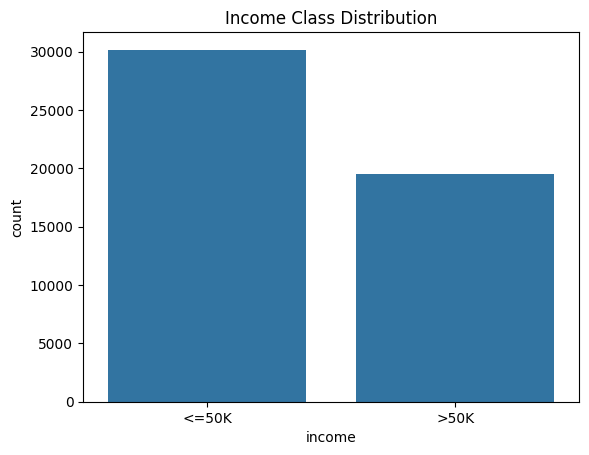

Income Class Counts income
<=50K    0.607447
>50K     0.392553
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class imbalance
sns.countplot(data=df_filtered, x='income')
plt.title('Income Class Distribution')
plt.show()

print('Income Class Counts', (df_filtered['income'].value_counts()/df_filtered.shape[0]))

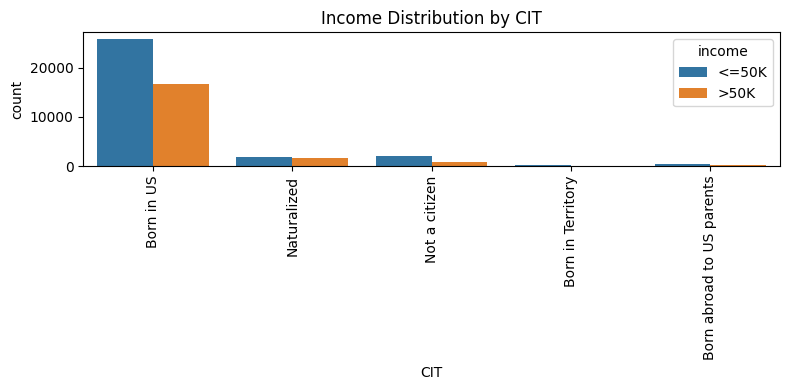

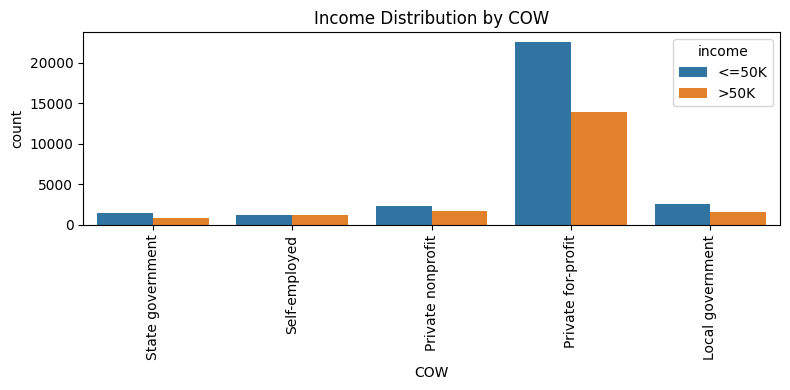

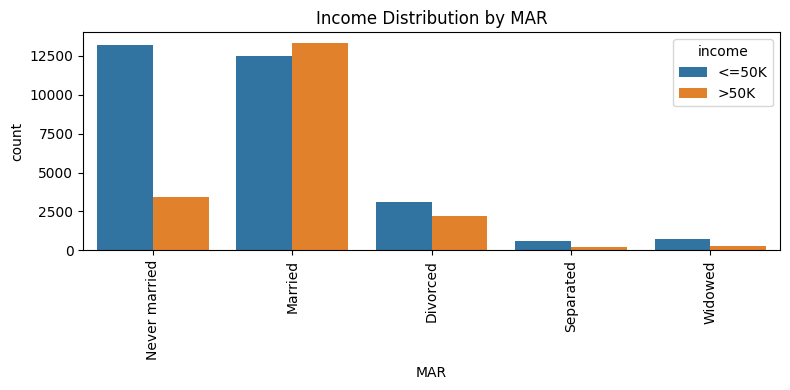

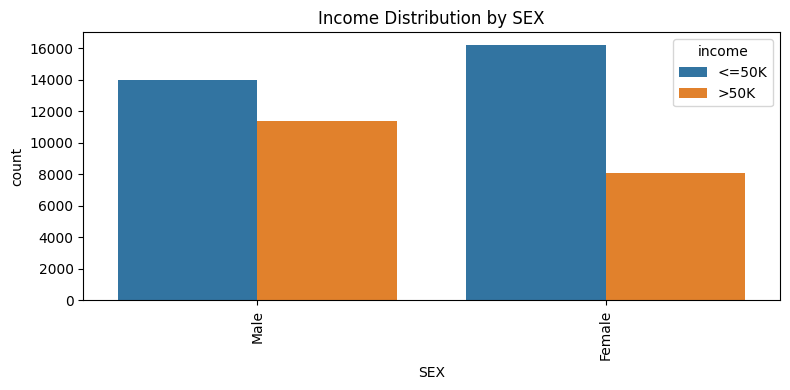

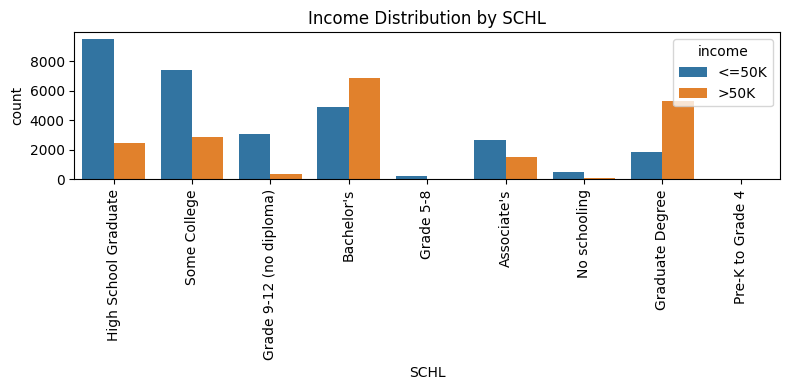

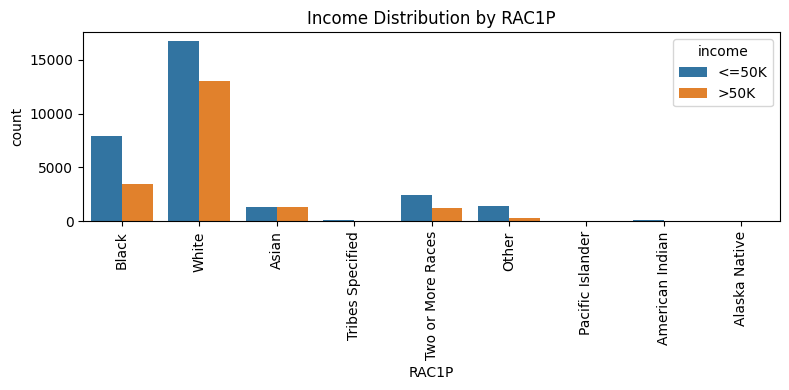

In [ ]:
#@title Visualize the count of income levels within categories.
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['CIT','COW','MAR','SEX','SCHL','RAC1P']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_filtered, x=var, hue='income')
    plt.title(f'Income Distribution by {var}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


##Crosstab + Chi-Square Test of Independence
A p-value < 0.05 suggests a statistically significant relationship between the variable and income.

In [ ]:
#@title To statistically test if there’s an association between the categorical variable and income.
import scipy.stats as stats

for var in categorical_vars:
    table = pd.crosstab(df_filtered[var], df_filtered['income'])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f'{var}: p-value = {p:.4f}')


CIT: p-value = 0.0000
COW: p-value = 0.0000
MAR: p-value = 0.0000
SEX: p-value = 0.0000
SCHL: p-value = 0.0000
RAC1P: p-value = 0.0000


In [ ]:

# List of string representations of NA
na_strings = ['NA', 'N/A', '-']# Replace string NAs with numpy.nan

df_cleaned = df.replace(na_strings, np.nan)

# Convert columns to numeric type after replacing NAs
# errors='coerce' will turn any remaining non-numeric values into NaN
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Now, calculate the correlation
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

        TEN  RAC1P  CIT  SCHL  BLD  HUPAC  COW  MAR  SEX  VEH       WKL  \
TEN     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
RAC1P   NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
CIT     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
SCHL    NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
BLD     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
HUPAC   NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
COW     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
MAR     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
SEX     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
VEH     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN       NaN   
WKL     NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN  1.000000   
AGEP    NaN    NaN  NaN   NaN  NaN    NaN  NaN  NaN  NaN  NaN  0.644997   
WAGP    NaN    NaN  NaN  

In [ ]:
df.columns

Index(['TEN', 'RAC1P', 'CIT', 'SCHL', 'BLD', 'HUPAC', 'COW', 'MAR', 'SEX',
       'VEH', 'WKL', 'AGEP', 'WAGP', 'NPF', 'GRPIP', 'WKHP', 'income'],
      dtype='object')

In [ ]:
df[['WKL', 'AGEP', 'NPF', 'GRPIP', 'WKHP','WAGP']].corr()

,WKL,AGEP,NPF,GRPIP,WKHP,WAGP
WKL,1.000000,0.644997,-0.322387,-0.041385,-0.340735,-0.180839
AGEP,0.644997,1.000000,-0.422149,-0.126989,0.055047,0.090185
NPF,-0.322387,-0.422149,1.000000,-0.041953,-0.086819,-0.037527
GRPIP,-0.041385,-0.126989,-0.041953,1.000000,-0.038518,-0.103515
WKHP,-0.340735,0.055047,-0.086819,-0.038518,1.000000,0.553494
WAGP,-0.180839,0.090185,-0.037527,-0.103515,0.553494,1.000000
